# Hypothesis Testing

## Scenarios

- Chemistry - do inputs from two different barley fields produce different
yields?
- Astrophysics - do star systems with near-orbiting gas giants have hotter
stars?
- Economics - demography, surveys, etc.
- Medicine - BMI vs. Hypertension, etc.
- Business - which ad is more effective given engagement?

![img1](./img/img1.png)

In [ ]:
#random chance that this difference exists vs statistical significance

![img2](./img/img2.png)

### Null Hypothesis / Alternative Hypothesis Structure

<img src="img/img3.png" width=350>

In [1]:
#there is no difference between the true population means
#then null hypothesis correct

### The Null Hypothesis

![gmork](https://vignette.wikia.nocookie.net/villains/images/2/2f/Ogmork.jpg/revision/latest?cb=20120217040244)  
There is NOTHING, **no** difference.

### The Alternative hypothesis

![difference](./img/giphy.gif)

### Error

- TYPE I: False positive rate (incorrectly reject)
- TYPE II: False negative rate (incorrectly fail to reject)

### Choosing the right error rate

- Alpha, α
- Sigma, σ
- Depends on field of study, 0.00001 ≤ α ≤ 0.2

### T-test

Why use it?
- Sometimes the population standard deviation is irrelevant, and sometimes it’s
unknown. (we’ll get to the different types of t-test later)
- Sometimes a sample is too small to be confident that it’s an accurate representation of reality

### T vs Z (again)

A t-test is like a modified z-test:
- Penalize for small sample size - “degrees of freedom”
- Use sample std. dev. s to estimate population σ

<img src="img/img5.png" width=500>

### T and Z in detail
<img src="img/img4.png" width=500>

### T-value table

<img src="img/img6.png" width=500>

### P-Values
<img src="https://imgs.xkcd.com/comics/significant.png" width=500>

[Source](https://xkcd.com/882/)

### Language of Hypothesis Testing

If p < α : we *reject* the null hypothesis<br>
If p > α : we *fail to reject* the null hypothesis


Language is **important**

### What if the experiment fails?

- Don’t throw out failed experiments
- This methodology, with this data, does not produce significant results
 - More data
 - More time
 - More details

### T-test success recipe

Regardless of the type of t-test you are performing, there are 5 main steps to executing them:

- Set up null and alternative hypotheses

- Choose a significance level

- Calculate the test statistic

- Determine the critical or p-value (find the rejection region)

- Compare t-value with critical t-value to accept or reject the Null hypothesis.

# Question 1
Is this any different from population?
- Population mean = 85
- Sample = [90,100,110]

#### Using `scipi`

In [ ]:
#H0 there is no difference in our sample vs population
#Ha there is a difference between our sample and the population
#alpha = 0.05
#this is a 2 sided test. i guess how you know that - difference - 
#so either greater or less than
#would potentially be more helpful if you couldn't see the data
#didnt know the outcome
#one sided Ha would be our sample mean is greater than our population mean


In [3]:
from scipy.stats import ttest_1samp
data = [90, 100, 110]
ttest_1samp(data, 85)

#cant reject null hypothesis
#p>alpha 12%>5%
#2.59 = t statistic - would need to go look at t table
#for one sided divide p value by 2
#t stat is not a linear scale so divide by 2 doesnt work here


Ttest_1sampResult(statistic=2.5980762113533156, pvalue=0.12168993434632014)

#### Manual implementation

In [4]:
from statistics import stdev

data = [90,100,110]
mu = 85
n = len(data)
s = stdev(data)
df = n-1

t = (100-85)/(s/(n**.5))
#denominator is std error

In [5]:
print(t)
print(df)

2.5980762113533156
2


# Question 2

I'm buying jeans from store A and store B.  I know nothing about their inventory other than prices. Should I go just one store for a less expensive pair of jeans?
I'm pretty apprehensive about this big decision so alpha = 0.10

Try this both manually and with scipy

- [20,30,30,50,75,25,30,30,40,80]
- [60,30,70,90,60,40,70,40]

In [6]:
from scipy.stats import ttest_ind

In [7]:
store1 = [20,30,30,50,75,25,30,30,40,80]
store2 = [60,30,70,90,60,40,70,40]

In [8]:
ttest_ind(store1, store2, equal_var=False)

Ttest_indResult(statistic=-1.7120298677915535, pvalue=0.10685037968363302)

In [9]:
#if were only looking at rejecting based on cheaper jeans. 1 sided
#alpha = .1
#can reject null hypothesis
#store 1 cheaper

In [10]:
import numpy as np

In [11]:
from scipy import stats
# np.random.seed(12345678)
# Test with sample with identical means:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-1.5791585115421425, pvalue=0.11461658152359655)

In [12]:
np.mean(rvs1)

3.7747084559039745

In [13]:
np.mean(rvs2)

4.78723798721956

In [14]:
#reject null hypothesis that these are the same 
#but that would not be true - false negative 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


<BarContainer object of 10 artists>

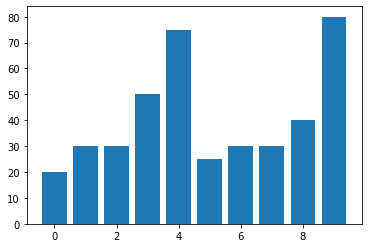

In [16]:
plt.bar(range(len(store1)),store1)

<BarContainer object of 8 artists>

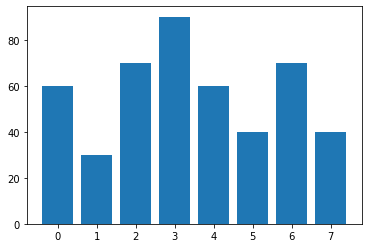

In [17]:
plt.bar(range(len(store2)),store2)

# Question 3
Given the same data 1, how many more samples would you need to achieve p = 0.01, assuming sample mean and sample std. dev. do not change.

In [18]:
data = [90,100,110]
mu = 85
n = len(data)
s = stdev(data)
df = n-1

t = (100-85)/(s/(n**.5))

In [19]:
print(t)

2.5980762113533156


In [20]:
for n in range(3,10):
    df = n-1
    t = (100-85)/(s/(n**.5))
    #100 is avg
    print (df,t)
    #want to reject null hypothesis 
    #use below table to compare to t table
    #at which degree of freedom gives stat sig conf to reject null hypothesis
    #need 5 degrees of freedom
    #6 total samples
    #need 3 more samples

2 2.5980762113533156
3 3.0
4 3.3541019662496843
5 3.674234614174767
6 3.968626966596886
7 4.242640687119286
8 4.5


In [21]:
for n in range(3,100):
    ttest_1samp(data,85)
    #must use actual data not stats were fudging so this doesnt work

# Using T-tests for hypothesis testing for the means

In [22]:
import pandas as pd


In [23]:
df = pd.read_csv('../day-2-hypothesis-testing/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


[Link to the dataset](https://www.kaggle.com/blastchar/telco-customer-churn)

__Your Turn__

1. Find how many different values are there in the PaymentMethod column.


In [25]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

__Your Turn__

1. Select one of the categories above in PaymentMethod and we will investigate whether this data is statistically significantly different from the national data or not.

2. Suppose we know that nationwide the average monthly average spendings for the service is $70 but we don't know the standard deviation for this data. Construct a hypothesis testing for the case, the certain PaymentMethod is different than the national data.
  - hint: use `scipy.stats.ttest_1samp`

3. In our case we will focus on Payment Method == `'Mailed check'` but you can work with others too.

$H_{a}$: Spending by mailed check is different than national average spending

$H_{0}$: there is no difference in the average spending between mailed check and national average

$\alpha$: 0.05


In [26]:
sample = df.loc[df.PaymentMethod == 'Mailed check'].MonthlyCharges
#observations

In [27]:
ttest_1samp(sample,70)
#we know population mean is 70 from above
#resounding yes we can reject null hypothesis
#greater than mean

Ttest_1sampResult(statistic=-39.79616513656546, pvalue=8.78311106869432e-242)

In [28]:
sample.mean()

43.917059553349915

In [29]:
len(sample)
#many observations and way lower mean
#if took fewer samples in ttest would be less able to reject

1612

In [30]:
ttest_1samp(sample.sample(5),70)
#now i cant reject

Ttest_1sampResult(statistic=-0.2985795728809848, pvalue=0.7801293687444255)

__Your Turn__

1. From the data set 'df' get the rows with SeniorCitizen ==1 and keep them in a variable called seniors

2. Keep other records in a variable called 'others'

3. Check how many observations do we have in each sample

In [35]:
seniors = df[df['SeniorCitizen'] == 1]
others = df[df['SeniorCitizen'] == 0]

print(seniors.shape)
print(others.shape)

(1142, 21)
(5901, 21)


NameError: name 'seniors' is not defined

__Your Turn__

1. Now we would like to compare the MonthlyCharges for Seniors and others. 

I hypothesize that seniors should have lower Monthlycharges average than others. 

2. Write a hypothesis test that checks this claim.


$H_{a}:$ avg monthly charges for senior customers is different that the average monthly charges for non-senior customers

$H_{0}:$ The avg monthly charges for senior customers is equal to the average other customer monthly charges

$\alpha:$ 0.05

Now we will test our results by using two sample t_test (`scipy.stats.ttest_ind`).

In [36]:
print(seniors.MonthlyCharges.mean())
print(seniors.MonthlyCharges.mean())


79.82035901926453
79.82035901926453


In [37]:
stats.ttest_ind(seniors.MonthlyCharges,others.MonthlyCharges,equal_var=False)

Ttest_indResult(statistic=22.288279118400933, pvalue=3.826212668910673e-98)